# Multiple Linear Regression

Create a model, train it, and use the model.

## Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Understanding the Data

West Roxbury
- Variable   	 	Description
- TOTAL VALUE    	Total assessed value for property, in thousands of USD
- TAX   		 	Tax bill amount based on total assessed value multiplied by the tax rate
- LOT SQFT          	Total lot size of parcel in square feet
- YR BUILT   	 	Year property was built
- GROSS AREA    	Gross floor area
- LIVING AREA         	Total living area for residential properties (ft2)
- FLOORS         	Number of floors
- ROOMS        	 	Total number of rooms
- BEDROOMS    	Total number of bedrooms
- FULL BATH   	 	Total number of full baths
- HALF BATH         	Total number of half baths
- KITCHEN        	 	Total number of kitchens
- FIREPLACE   	 	Total number of fireplaces
- REMODEL        	When house was remodeled (Recent/Old/None)


## Reading the data

In [3]:
df = pd.read_csv("WestRoxbury.csv")

# Take a look at the dataset
df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


## Cleanup

In [6]:
df.columns = [s.strip().replace(' ', '_')
                          for s in df.columns]

df.head()


,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


Let's select some features that we will use for regression.

In [7]:
cdf = df[['TOTAL_VALUE', 'LOT_SQFT', "LIVING_AREA", 'ROOMS']]
cdf.head()

,TOTAL_VALUE,LOT_SQFT,LIVING_AREA,ROOMS
0,344.2,9965,1352,6
1,412.6,6590,1976,10
2,330.1,7500,1371,8
3,498.6,13773,2608,9
4,331.5,5000,1438,7


## Create Train and Test dataset

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


## Train data distribution

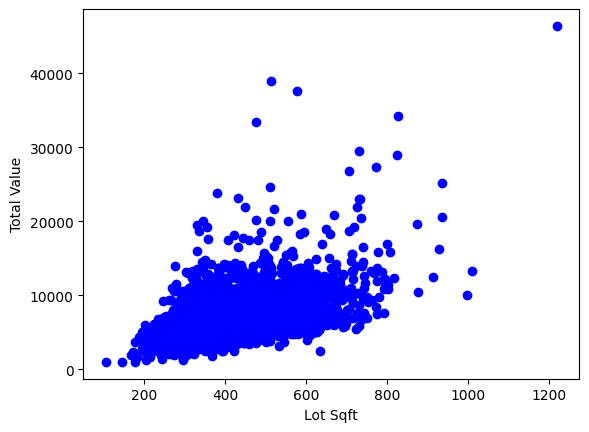

In [12]:
plt.scatter(cdf.TOTAL_VALUE, cdf.LOT_SQFT, color='blue')
plt.xlabel("Lot Sqft")
plt.ylabel("Total Value")
plt.show()

# Multiple Linear Regression Model

- Dependent variable: 'TOTAL_VALUE' 
- Independent variables: 'LOT_SQFT', "LIVING_AREA", 'ROOMS'

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['LOT_SQFT', "LIVING_AREA", 'ROOMS']])
train_y = np.asanyarray(train[['TOTAL_VALUE']])
regr.fit(train_x, train_y)

# The coefficients
print("Coefficients", regr.coef_)
print("Intercepts", regr.intercept_)


Coefficients [[0.0087111  0.12321867 5.60346764]]
Intercepts [94.84912395]


## Prediction

In [29]:
y_hat = regr.predict(test[['LOT_SQFT', "LIVING_AREA", 'ROOMS']])
test_x = np.asanyarray(test[['LOT_SQFT', "LIVING_AREA", 'ROOMS']])
test_y = np.asanyarray(test[['TOTAL_VALUE']])


# This function returns the mean absolute error.
print("Residual sum of squares: %.4f" % np.mean((y_hat - test_y))**2)
#print(y_hat)





Residual sum of squares: 1.3576


c:\Users\Dr_It\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
print("Variance score %.2f" % regr.score(test_x, test_y))


Variance score 0.73
